In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import spiceypy as spice

In [2]:
spice.tkvrsn("TOOLKIT")

'CSPICE_N0066'

In [3]:
def graph_kernel( kernel, start_time, end_time, step = 2000 ):
    """
    Function to graph a kernels position and orientation given a kernel name, start/end time, and step.
    
    Parameters
    ----------
    kernel : string 
            name, with no file extension, and location to kernel to be graphed
    start_time : string
            date and time in string form that will begin observation graphed
    end_time : string
            date and time in string form that will end observation graphed
    step : integer
            number of seconds to pass before plotting a point between start_time and end_time
            default = 2000
    Returns
    -------
    : NULL   
    """
    # Load kernels
    kernels = ['aig_ch1_sclk_complete_biased_m1p816.tsc', 'naif0012.tls', 'm3Addendum004.ti']
    kernels.append(kernel + '.bc')
    kernels.append(kernel + '.bsp')
    
    spice.furnsh(kernels)
    
    # get et values one and two, we could vectorize str2et
    etOne = spice.str2et(start_time)
    etTwo = spice.str2et(end_time)
    
    times = [x*(etTwo-etOne)/step + etOne for x in range(step)]
    
    positions, lightTimes = spice.spkpos('MOON', times, 'J2000', 'NONE', 'CH1')
    positions = np.asarray(positions).T # positions is a list, make it an ndarray for easier indexing
    fig = plt.figure(1, figsize=(10, 10))
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot(positions[0], positions[1], positions[2])
    plt.title('Positions of {} from {} to {}'.format(kernel, start_time, end_time))
    plt.show()
    
    matrices = []
    
    for time in times:
        matrices.append( spice.pxform('J2000', 'CH1_SPACECRAFT', time) )
    
    orientations = []
    
    for i in range(0, len( positions[0] )):
        orientations.append( np.matmul( matrices[i], positions[:, i] ) )
        
    orientations = np.array(orientations)
    fig = plt.figure(2, figsize=(10, 10))
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot(orientations[:, 0], orientations[:, 1], orientations[:, 2])
    plt.title('Orientation of {} from {} to {}'.format(kernel, start_time, end_time))
    plt.show()
        
    spice.kclear()

In [4]:
def graph_deltas( kernel1, kernel2 ,start_time, end_time, step = 2000 ):
    """
    Function to graph the deltas between each position in kernel1 and each position in kernel2 
    given kernel names, start/end time, and step.
    
    Parameters
    ----------
    kernel1 : string 
            name, with no file extension, and location to first kernel
    kernel2 : string 
            name, with no file extension, and location to second kernel
    start_time : string
            date and time in string form that will begin observation graphed
    end_time : string
            date and time in string form that will end observation graphed
    step : integer
            number of seconds to pass before plotting a point between start_time and end_time
            default = 2000
    Returns
    -------
    : NULL   
    """
    kernels = ['aig_ch1_sclk_complete_biased_m1p816.tsc', 'naif0012.tls', 'm3Addendum004.ti']
    kernels.append(kernel1 + '.bc')
    kernels.append(kernel1 + '.bsp')
    
    spice.furnsh(kernels)
    
    # get et values one and two, we could vectorize str2et
    etOne = spice.str2et(start_time)
    etTwo = spice.str2et(end_time)
    
    times = [x*(etTwo-etOne)/step + etOne for x in range(step)]
    positions1, lightTimes1 = spice.spkpos('MOON', times, 'J2000', 'NONE', 'CH1')
    positions1 = np.asarray(positions1).T # positions is a list, make it an ndarray for easier indexing
    
    matrices = []
    for time in times:
        matrices.append( spice.pxform('J2000', 'CH1_SPACECRAFT', time) )
    
    orientations1 = []
    for i in range(0, len( positions1[0] )):
        orientations1.append( np.matmul( matrices[i], positions1[:, i] ) )
        
    orientations1 = np.array(orientations1)
    
    spice.kclear()
    
    kernels = ['aig_ch1_sclk_complete_biased_m1p816.tsc', 'naif0012.tls', 'm3Addendum004.ti']
    kernels.append(kernel2 + '.bc')
    kernels.append(kernel2 + '.bsp')
    
    spice.furnsh(kernels)
    
    # get et values one and two, we could vectorize str2et
    etOne = spice.str2et(start_time)
    etTwo = spice.str2et(end_time)
    
    times = [x*(etTwo-etOne)/step + etOne for x in range(step)]
    positions2, lightTimes2 = spice.spkpos('MOON', times, 'J2000', 'NONE', 'CH1')
    positions2 = np.asarray(positions2).T # positions is a list, make it an ndarray for easier indexing
    
    matrices = []
    for time in times:
        matrices.append( spice.pxform('J2000', 'CH1_SPACECRAFT', time) )
    
    orientations2 = []
    for i in range(0, len( positions2[0] )):
        orientations2.append( np.matmul( matrices[i], positions2[:, i] ) )
        
    orientations2 = np.array(orientations2)
    
    spice.kclear()

    
    
    positions = [[], [], []]
    for i in range(3):
        positions[i] = np.subtract(positions1[i], positions2[i])
        
    orientations = [[], [], []]
    for i in range(3):
        orientations[i] = np.subtract(orientations1[i], orientations2[i])
    
    fig = plt.figure(1 ,figsize=(10, 10))
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot(positions[0], positions[1], positions[2])
    plt.title('Delta of Positions for {} and {} from {} to {}'.format(kernel1, kernel2, start_time, end_time))
    plt.show()
    
    orientations = np.array(orientations)
    fig = plt.figure(2, figsize=(10, 10))
    ax  = fig.add_subplot(111, projection='3d')
    ax.plot(orientations[:, 0], orientations[:, 1], orientations[:, 2])
    plt.title('Delta of Orientation for {} and {} from {} to {}'.format(kernel1, kernel2, start_time, end_time))
    plt.show()

# Graphing Functions Above Works With nadir and basematchgrnd files

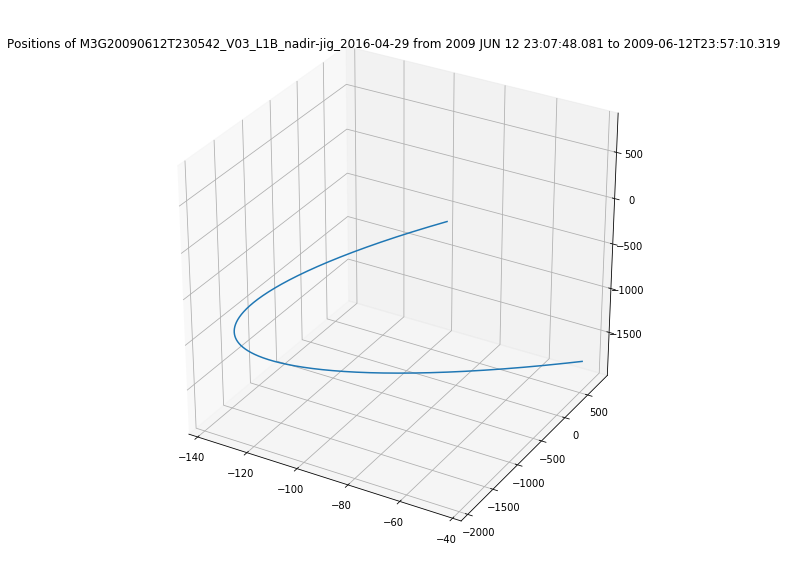

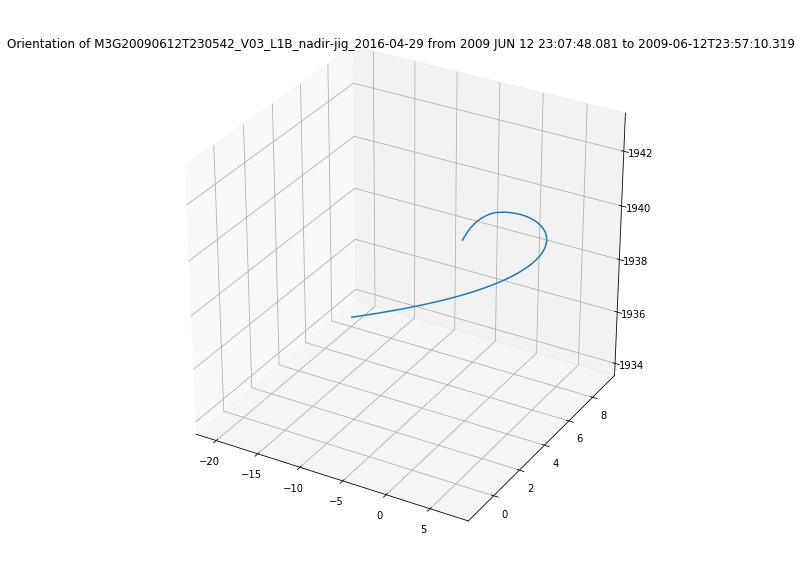

In [5]:
# nadir
graph_kernel('M3G20090612T230542_V03_L1B_nadir-jig_2016-04-29', '2009 JUN 12 23:07:48.081', '2009-06-12T23:57:10.319')

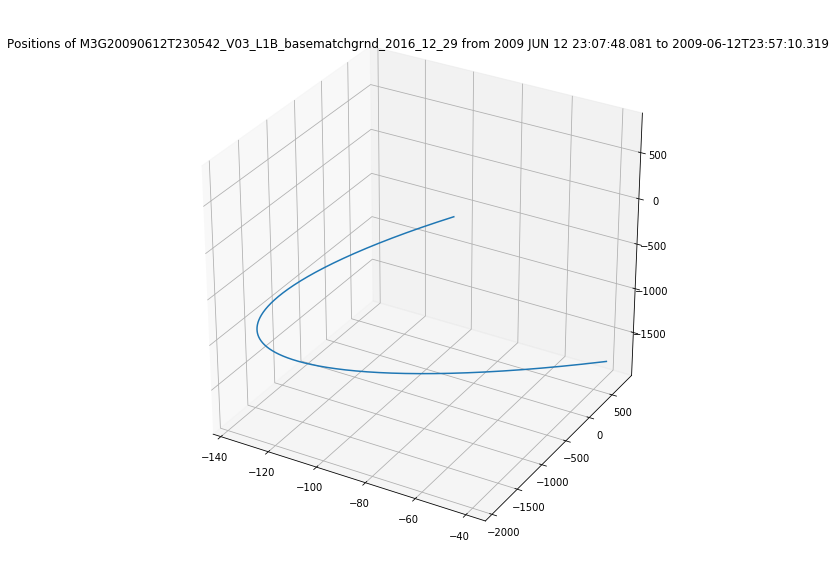

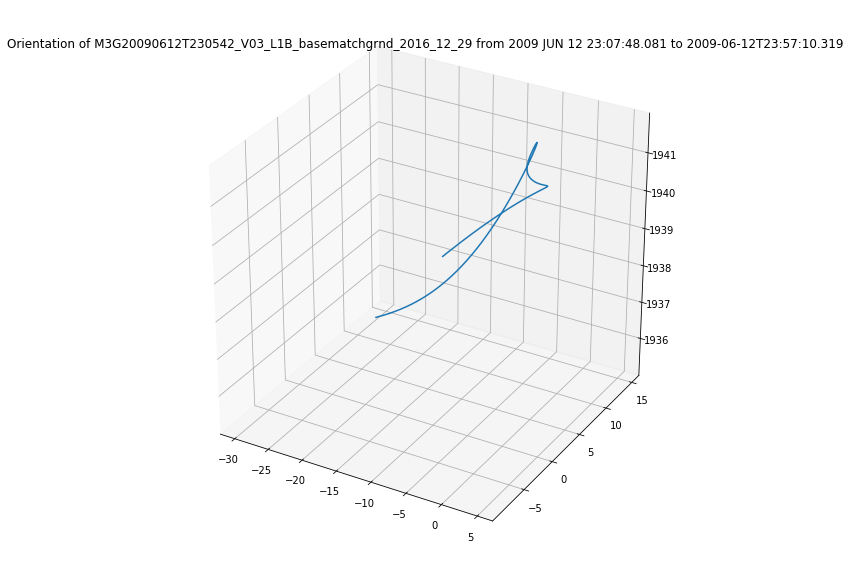

In [6]:
# basematchgrnd
graph_kernel('M3G20090612T230542_V03_L1B_basematchgrnd_2016_12_29', '2009 JUN 12 23:07:48.081', '2009-06-12T23:57:10.319')

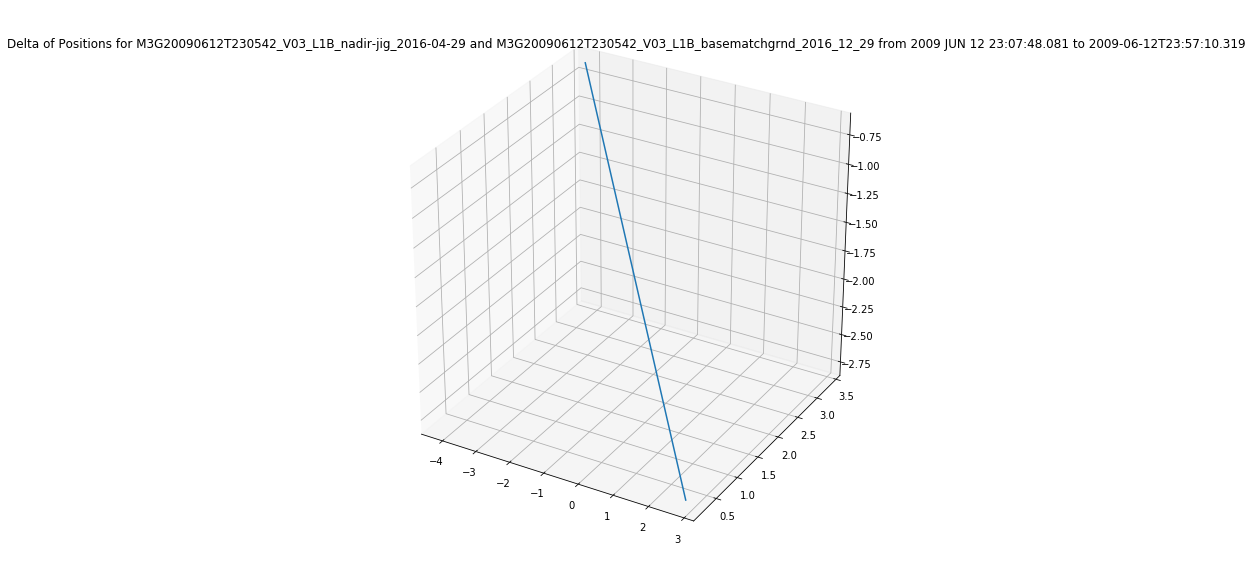

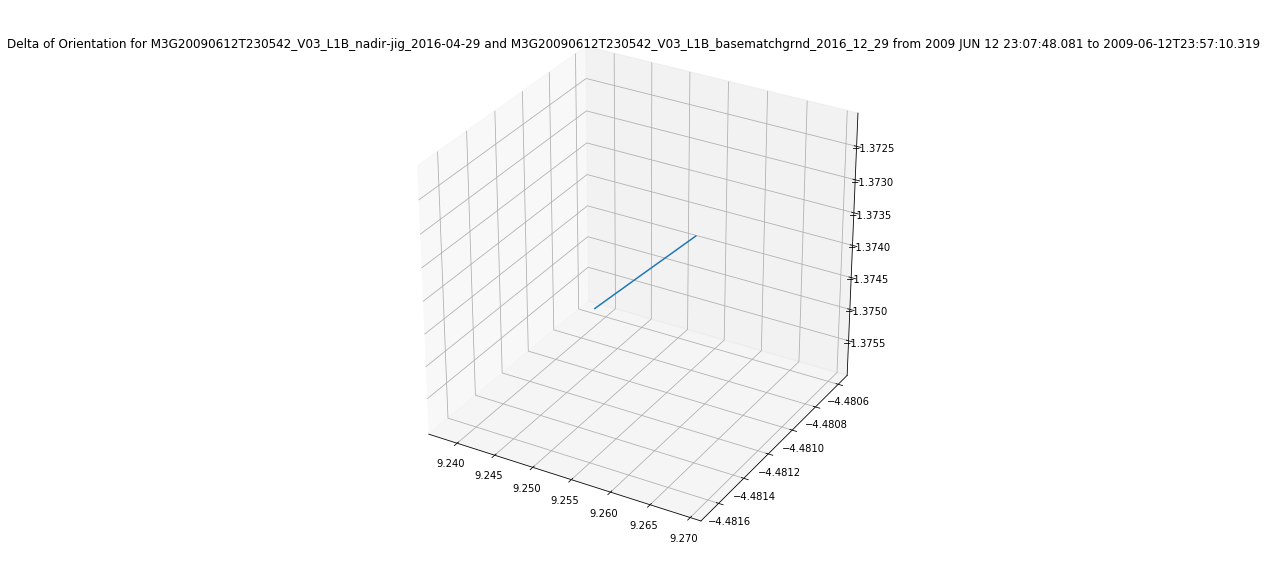

In [7]:
# delta of pre and post above
graph_deltas( 'M3G20090612T230542_V03_L1B_nadir-jig_2016-04-29', 'M3G20090612T230542_V03_L1B_basematchgrnd_2016_12_29', '2009 JUN 12 23:07:48.081', '2009-06-12T23:57:10.319' )